In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TSFN GHG Emission/Total Emission/Emissions_Totals_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')

In [4]:
df.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag,Note
0,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1961,1961,3050,FAO TIER 1,kilotonnes,0.8762,E,NaN
1,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1962,1962,3050,FAO TIER 1,kilotonnes,0.8829,E,NaN
2,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1963,1963,3050,FAO TIER 1,kilotonnes,0.8236,E,NaN
3,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1964,1964,3050,FAO TIER 1,kilotonnes,0.8882,E,NaN
4,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1965,1965,3050,FAO TIER 1,kilotonnes,0.8978,E,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024987 entries, 0 to 2024986
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Area Code        int64  
 1   Area Code (M49)  object 
 2   Area             object 
 3   Item Code        int64  
 4   Item             object 
 5   Element Code     int64  
 6   Element          object 
 7   Year Code        int64  
 8   Year             int64  
 9   Source Code      int64  
 10  Source           object 
 11  Unit             object 
 12  Value            float64
 13  Flag             object 
 14  Note             float64
dtypes: float64(2), int64(6), object(7)
memory usage: 231.7+ MB


In [6]:
df.isnull().sum()

Area Code                0
Area Code (M49)          0
Area                     0
Item Code                0
Item                     0
Element Code             0
Element                  0
Year Code                0
Year                     0
Source Code              0
Source                   0
Unit                     0
Value                    0
Flag                     0
Note               2024987
dtype: int64

In [7]:
filtered_df = df.drop(columns=['Area Code','Area Code (M49)','Item Code','Element Code','Year Code','Source Code','Source','Flag','Note'])

In [8]:
unique_unit = df['Unit'].unique()
print(unique_unit)

['kilotonnes']


In [9]:
unique_items = df['Item'].unique()
print(unique_items)

['Crop Residues' 'Rice Cultivation' 'Burning - Crop residues'
 'Enteric Fermentation' 'Manure Management' 'Manure left on Pasture'
 'Manure applied to Soils' 'Synthetic Fertilizers' 'Drained organic soils'
 'Drained organic soils (CO2)' 'Drained organic soils (N2O)' 'Forestland'
 'Net Forest conversion' 'Savanna fires' 'Fires in organic soils'
 'Forest fires' 'Fires in humid tropical forests'
 'Agrifood Systems Waste Disposal' 'Fertilizers Manufacturing'
 'On-farm Electricity Use' 'Food Retail' 'Food Household Consumption'
 'Food Transport' 'Energy' 'IPPU' 'Waste' 'Other' 'Farm gate'
 'Land Use change' 'Emissions on agricultural land'
 'Pre- and Post- Production' 'Agrifood systems' 'IPCC Agriculture'
 'Agricultural Soils' 'LULUCF' 'AFOLU' 'All sectors with LULUCF'
 'All sectors without LULUCF' 'On-farm energy use'
 'Pesticides Manufacturing' 'Food Processing' 'Food Packaging'
 'On-farm Heat Use' 'International bunkers']


In [10]:
unique_areas = df['Area'].unique()
print(unique_areas)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' '

In [11]:
selected_items = ['Rice Cultivation', 'Crop Residues', 'Burning - Crop residues','Synthetic Fertilizers', 'Fertilizers Manufacturing', 'On-farm Electricity Use', 'Food Retail', 'Food Household Consumption', 'Food Transport', 'Waste','On-farm energy use', 'Pesticides Manufacturing', 'Food Processing', 'Food Packaging', 'On-farm Heat Use','Drained organic soils','Agrifood Systems Waste Disposal']

selected_area = ['Australia and New Zealand', 'Caribbean', 'Central America', 'Central Asia',
    'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Melanesia', 'Micronesia',
    'Middle Africa', 'Northern Africa', 'Northern America', 'Northern Europe',
    'Polynesia', 'South America', 'South-eastern Asia', 'Southern Africa',
    'Southern Asia', 'Southern Europe', 'Western Africa', 'Western Asia', 'Western Europe',
    'Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'World', 'Annex I countries',
    'European Union (27)', 'Land Locked Developing Countries', 'Least Developed Countries',
    'Low Income Food Deficit Countries', 'Net Food Importing Developing Countries',
    'Non-Annex I countries', 'OECD', 'Small Island Developing States','China']

selected_gases = ['Emissions (CO2eq) (AR5)']

filtered_df = filtered_df[filtered_df['Item'].isin(selected_items)]
filtered_df = filtered_df[~filtered_df['Area'].isin(selected_area)]
filtered_df = filtered_df[filtered_df['Element'].isin(selected_gases)]
filtered_df = filtered_df[filtered_df['Year'] >= 1990]
filtered_df = filtered_df[filtered_df['Year'] <= 2020]

filtered_df = filtered_df.reset_index(drop=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91467 entries, 0 to 91466
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     91467 non-null  object 
 1   Item     91467 non-null  object 
 2   Element  91467 non-null  object 
 3   Year     91467 non-null  int64  
 4   Unit     91467 non-null  object 
 5   Value    91467 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
unique_items = filtered_df['Item'].unique()
print(unique_items)

['Crop Residues' 'Rice Cultivation' 'Burning - Crop residues'
 'Synthetic Fertilizers' 'Drained organic soils'
 'Agrifood Systems Waste Disposal' 'Fertilizers Manufacturing'
 'On-farm Electricity Use' 'Food Retail' 'Food Household Consumption'
 'Food Transport' 'Waste' 'On-farm energy use' 'Pesticides Manufacturing'
 'Food Processing' 'Food Packaging' 'On-farm Heat Use']


In [13]:
unique_gases = filtered_df['Element'].unique()
print(unique_gases)

['Emissions (CO2eq) (AR5)']


In [14]:
filtered_df.head()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1990,kilotonnes,205.6077
1,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1991,kilotonnes,209.4971
2,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1992,kilotonnes,196.5341
3,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1993,kilotonnes,230.8175
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1994,kilotonnes,242.0494


In [15]:
filtered_df.to_csv('TotalEmission_SeperatedCountries.csv', index=False)

In [16]:
malaysia = ['Malaysia']
malaysia_df = filtered_df[filtered_df['Area'].isin(malaysia)]
malaysia_df = malaysia_df.reset_index(drop=True)
malaysia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     477 non-null    object 
 1   Item     477 non-null    object 
 2   Element  477 non-null    object 
 3   Year     477 non-null    int64  
 4   Unit     477 non-null    object 
 5   Value    477 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 22.5+ KB


In [17]:
malaysia_df.to_csv('TotalEmission_Malaysia.csv', index=False)

In [18]:
asia_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',
    'Brunei Darussalam', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia',
    'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic",
    'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
    'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Republic of Korea',
    'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic',
    'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan',
    'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen',
    # Add more Asian countries as needed
]

asia_df = filtered_df[filtered_df['Area'].isin(asia_countries)]
asia_df = asia_df.reset_index(drop=True)
asia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19251 entries, 0 to 19250
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     19251 non-null  object 
 1   Item     19251 non-null  object 
 2   Element  19251 non-null  object 
 3   Year     19251 non-null  int64  
 4   Unit     19251 non-null  object 
 5   Value    19251 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 902.5+ KB


In [19]:
asia_df.to_csv('TotalEmission_Asia.csv', index=False)

In [20]:
# Filter the DataFrame for the specified conditions
filtered_items_2019 = asia_df[(asia_df['Year'] == 2019) & (asia_df['Item'] == 'Drained organic soils')]
filtered_items_2020 = asia_df[(asia_df['Year'] == 2020) & (asia_df['Item'] == 'Drained organic soils')]

print(filtered_items_2019)
print(filtered_items_2020)

                                   Area                   Item  \
153                         Afghanistan  Drained organic soils   
489                             Armenia  Drained organic soils   
944                          Azerbaijan  Drained organic soils   
1325                            Bahrain  Drained organic soils   
1795                         Bangladesh  Drained organic soils   
2257                             Bhutan  Drained organic soils   
2648                  Brunei Darussalam  Drained organic soils   
3071                           Cambodia  Drained organic soils   
3385                            Georgia  Drained organic soils   
3883                              India  Drained organic soils   
4400                          Indonesia  Drained organic soils   
4401                          Indonesia  Drained organic soils   
4898         Iran (Islamic Republic of)  Drained organic soils   
5362                               Iraq  Drained organic soils   
5787      

##Top 10 Countries of CO2eq Emissions




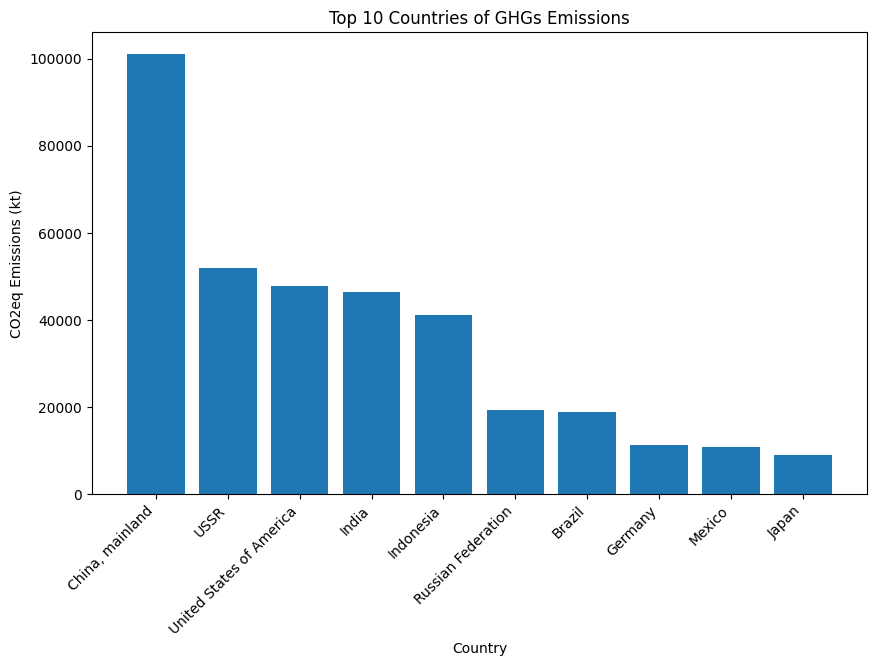

In [21]:
# Group by 'Area' (country) and calculate the mean 'Value' for each country
mean_values = filtered_df.groupby('Area')['Value'].mean().reset_index()

# Sort by mean value in descending order and select the top 10 countries
top_10_countries = mean_values.sort_values(by='Value', ascending=False).head(10)

# Create a bar chart for the top 10 countries
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Area'], top_10_countries['Value'])
plt.title('Top 10 Countries of GHGs Emissions')
plt.xlabel('Country')
plt.ylabel('CO2eq Emissions (kt)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

##Highest CO2eq item



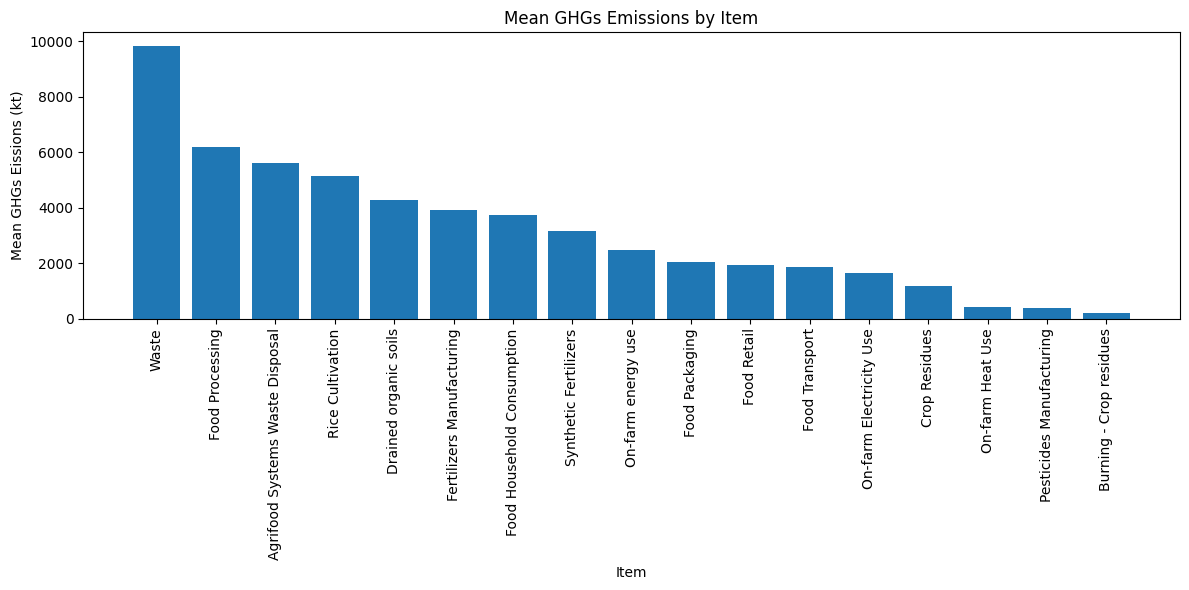

In [22]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item = filtered_df.groupby('Item')['Value'].mean().reset_index()

# Sort the data by mean CO2eq value in descending order
mean_co2eq_by_item = mean_co2eq_by_item.sort_values(by='Value', ascending=False)

# Create a bar chart to visualize the mean CO2eq for each item
plt.figure(figsize=(12, 6))
plt.bar(mean_co2eq_by_item['Item'], mean_co2eq_by_item['Value'])
plt.title('Mean GHGs Emissions by Item')
plt.xlabel('Item')
plt.ylabel('Mean GHGs Eissions (kt)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

###Highest GHGs Emissions by Item in Malaysia

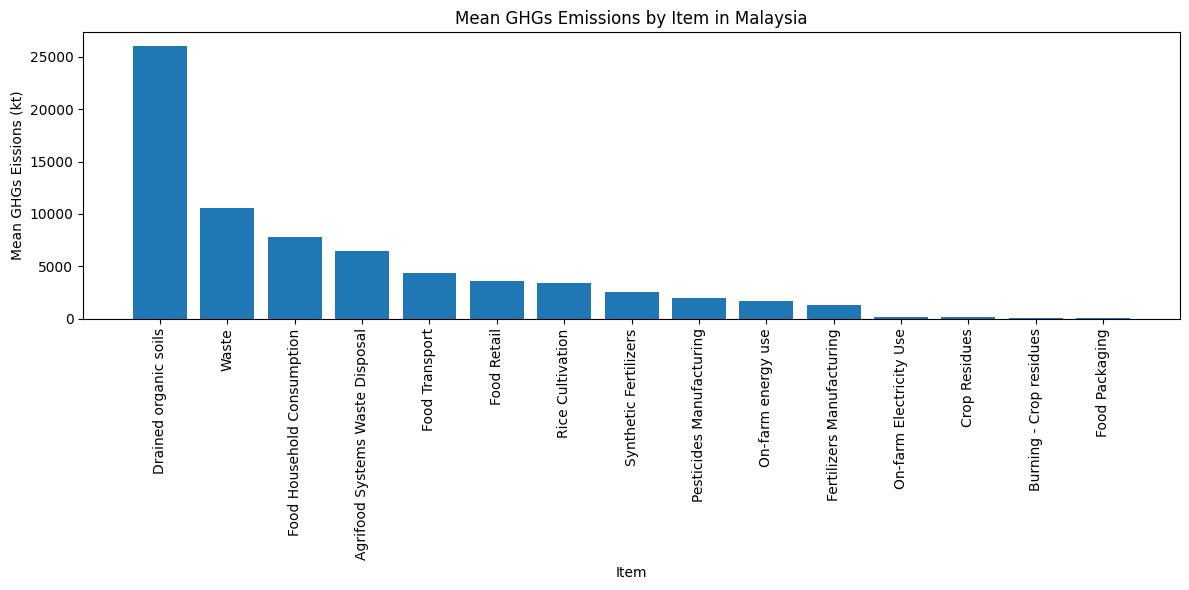

In [23]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item_malaysia = malaysia_df.groupby('Item')['Value'].mean().reset_index()

# Sort the data by mean CO2eq value in descending order
mean_co2eq_by_item_malaysia = mean_co2eq_by_item_malaysia.sort_values(by='Value', ascending=False)

# Create a bar chart to visualize the mean CO2eq for each item
plt.figure(figsize=(12, 6))
plt.bar(mean_co2eq_by_item_malaysia['Item'], mean_co2eq_by_item_malaysia['Value'])
plt.title('Mean GHGs Emissions by Item in Malaysia')
plt.xlabel('Item')
plt.ylabel('Mean GHGs Eissions (kt)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

###Highest GHGs Emissions by Item in Asia

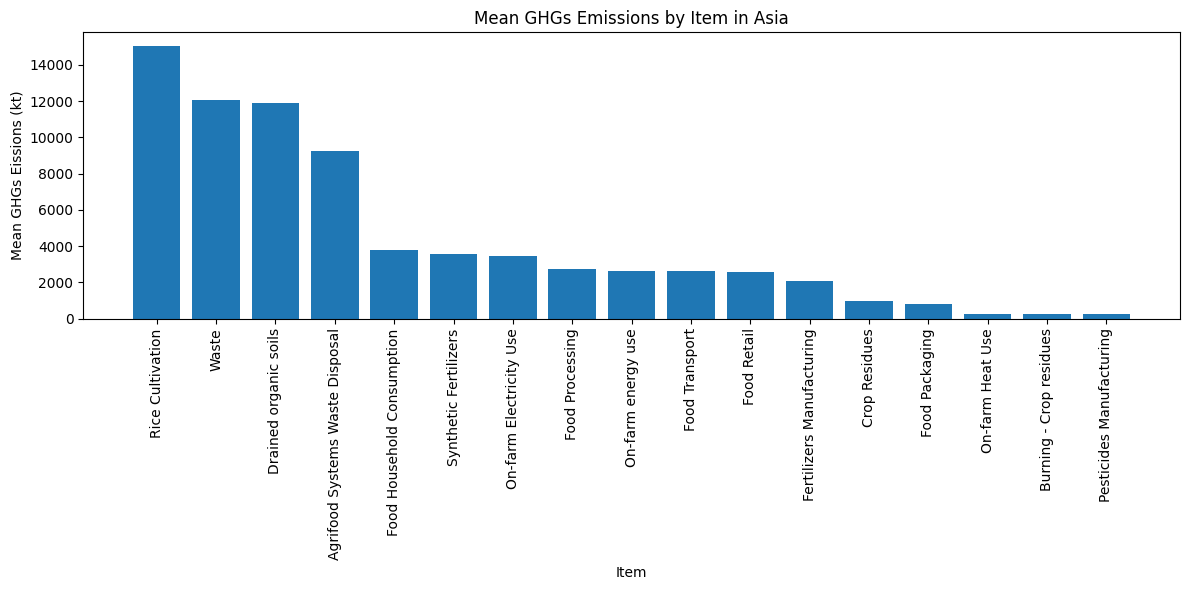

In [24]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item_asia = asia_df.groupby('Item')['Value'].mean().reset_index()

# Sort the data by mean CO2eq value in descending order
mean_co2eq_by_item_asia = mean_co2eq_by_item_asia.sort_values(by='Value', ascending=False)

# Create a bar chart to visualize the mean CO2eq for each item
plt.figure(figsize=(12, 6))
plt.bar(mean_co2eq_by_item_asia['Item'], mean_co2eq_by_item_asia['Value'])
plt.title('Mean GHGs Emissions by Item in Asia')
plt.xlabel('Item')
plt.ylabel('Mean GHGs Eissions (kt)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

###Top 10 Countries vs. Food Wastage for GHGs Emissions

In [25]:
# Create a dataframe containing only the top item
top_item = mean_co2eq_by_item.head(1)

# Concatenate the top item with the top 10 countries
combined_countries_item = pd.concat([top_item, top_10_countries])

# Fill the 'NaN' values in the 'Area' column with 'Waste'
combined_countries_item['Area'].fillna('Waste', inplace=True)

In [26]:
print(top_item)

     Item       Value
16  Waste  9832.57527


In [27]:
print(combined_countries_item)

      Item          Value                      Area
16   Waste    9832.575270                     Waste
46     NaN  101041.293744           China, mainland
222    NaN   51841.584254                      USSR
229    NaN   47762.612010  United States of America
100    NaN   46449.495449                     India
101    NaN   41216.072750                 Indonesia
178    NaN   19337.704907        Russian Federation
28     NaN   18889.997966                    Brazil
83     NaN   11364.408858                   Germany
136    NaN   10703.789434                    Mexico
109    NaN    8952.192298                     Japan


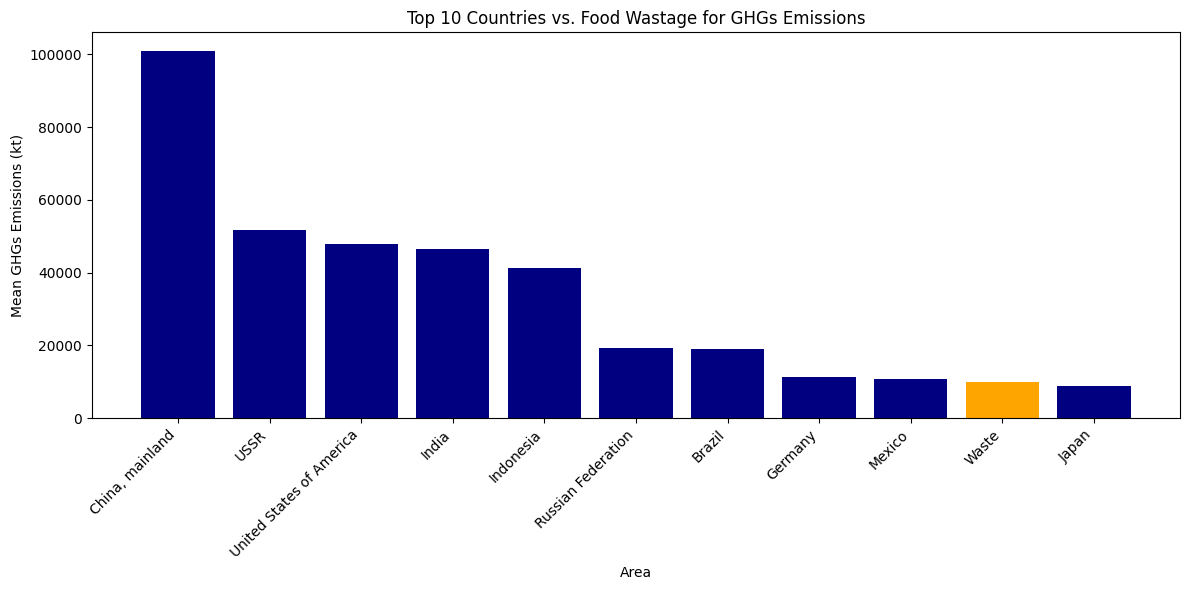

In [28]:
# Sort the DataFrame by the 'Value' column in descending order
combined_countries_item = combined_countries_item.sort_values(by='Value', ascending=False)

# Create a bar chart to visualize the 'Area' and 'Value' columns
plt.figure(figsize=(12, 6))

# Set the color for the 'Waste' category to orange
colors = ['orange' if area == 'Waste' else 'navy' for area in combined_countries_item['Area']]

plt.bar(combined_countries_item['Area'], combined_countries_item['Value'], color=colors)
plt.title('Top 10 Countries vs. Food Wastage for GHGs Emissions')
plt.xlabel('Area')
plt.ylabel('Mean GHGs Emissions (kt)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



##Historical trends for each item

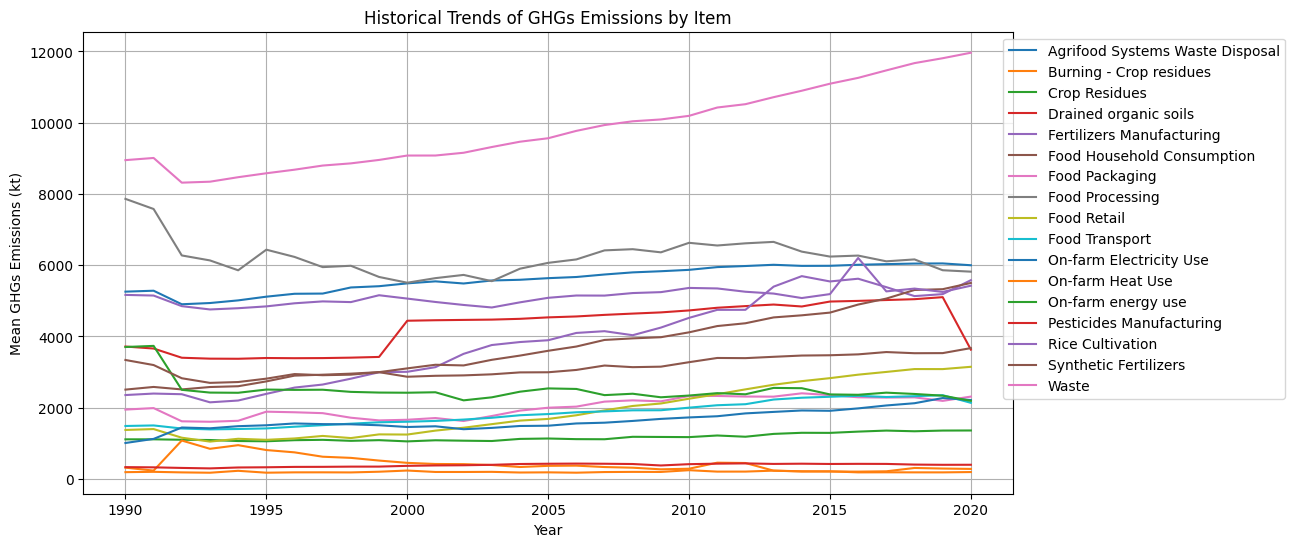

In [29]:
# Group by 'Item' and 'Year' and calculate the mean 'Value' for each combination
mean_co2eq_by_item_year = filtered_df.groupby(['Item', 'Year'])['Value'].mean().reset_index()

# Create a line plot for each item
plt.figure(figsize=(12, 6))

# Loop through unique items and create a line plot for each item
for item in mean_co2eq_by_item_year['Item'].unique():
    item_data = mean_co2eq_by_item_year[mean_co2eq_by_item_year['Item'] == item]
    plt.plot(item_data['Year'], item_data['Value'], label=item)

plt.title('Historical Trends of GHGs Emissions by Item')
plt.xlabel('Year')
plt.ylabel('Mean GHGs Emissions (kt)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

### Historical trends for top 5 item

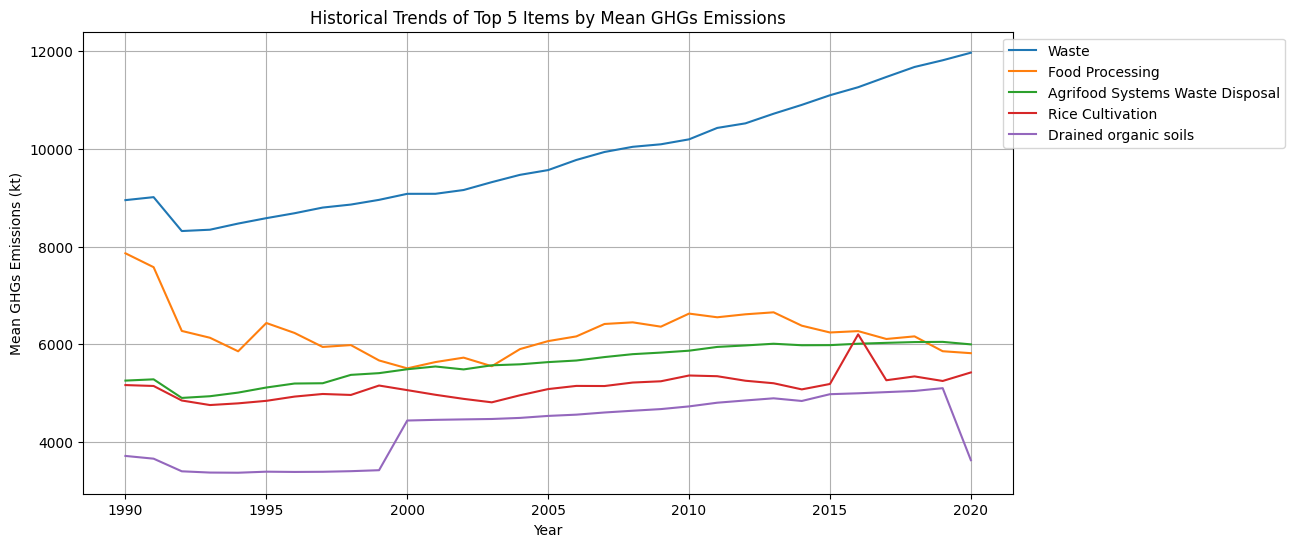

In [30]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item = filtered_df.groupby('Item')['Value'].mean().reset_index()

# Sort the items by mean CO2eq value in descending order
mean_co2eq_by_item = mean_co2eq_by_item.sort_values(by='Value', ascending=False)

# Select the top 5 items with the highest mean CO2eq values
top_5_items = mean_co2eq_by_item.head(5)

# Filter the original DataFrame to include only the top 5 items
top_5_history = filtered_df[filtered_df['Item'].isin(top_5_items['Item'])]

# Group by 'Item' and 'Year' on the filtered data and calculate the mean 'Value' for each combination
mean_co2eq_by_item_year_5 = top_5_history.groupby(['Item', 'Year'])['Value'].mean().reset_index()

# Create a line plot for each of the top 5 items
plt.figure(figsize=(12, 6))

# Loop through the top 5 items and create a line plot for each item
for item in top_5_items['Item']:
    item_data_5 = mean_co2eq_by_item_year_5[mean_co2eq_by_item_year_5['Item'] == item]
    plt.plot(item_data_5['Year'], item_data_5['Value'], label=item)

plt.title('Historical Trends of Top 5 Items by Mean GHGs Emissions')
plt.xlabel('Year')
plt.ylabel('Mean GHGs Emissions (kt)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

###Historical Trends of Top 5 Items in Malaysia

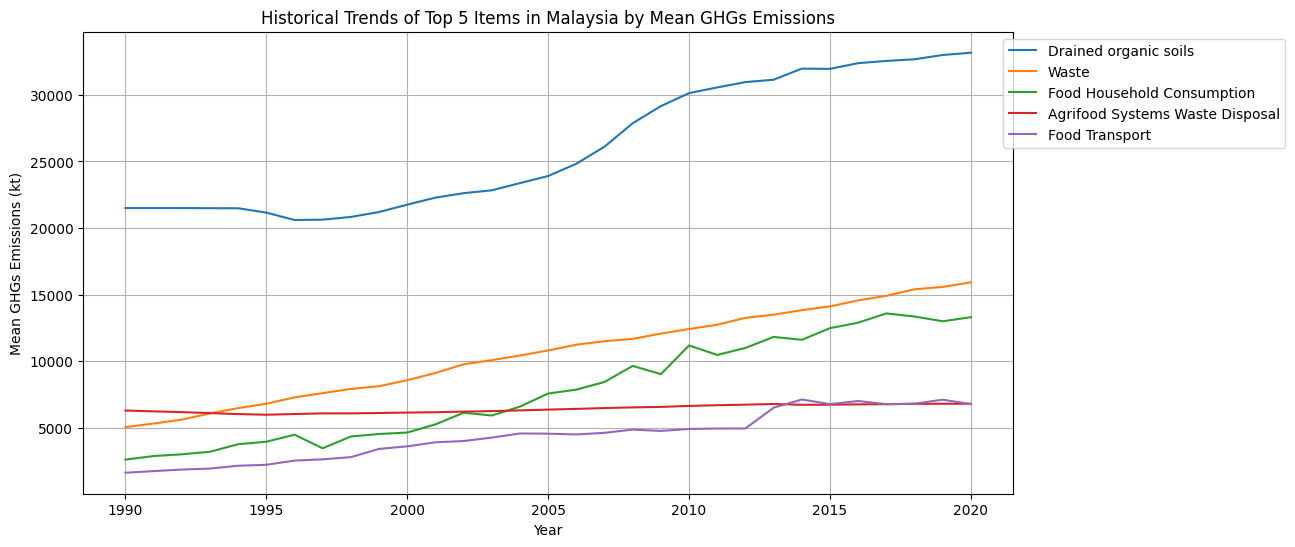

In [31]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item_malaysia = malaysia_df.groupby('Item')['Value'].mean().reset_index()

# Sort the items by mean CO2eq value in descending order
mean_co2eq_by_item_malaysia = mean_co2eq_by_item_malaysia.sort_values(by='Value', ascending=False)

# Select the top 5 items with the highest mean CO2eq values
top_5_items_malaysia = mean_co2eq_by_item_malaysia.head(5)

# Filter the original DataFrame to include only the top 5 items
top_5_history_malaysia = malaysia_df[malaysia_df['Item'].isin(top_5_items_malaysia['Item'])]

# Group by 'Item' and 'Year' on the filtered data and calculate the mean 'Value' for each combination
mean_co2eq_by_item_year_malaysia = top_5_history_malaysia.groupby(['Item', 'Year'])['Value'].mean().reset_index()

# Create a line plot for each of the top 5 items
plt.figure(figsize=(12, 6))

# Loop through the top 5 items and create a line plot for each item
for item in top_5_items_malaysia['Item']:
    item_data_msia = mean_co2eq_by_item_year_malaysia[mean_co2eq_by_item_year_malaysia['Item'] == item]
    plt.plot(item_data_msia['Year'], item_data_msia['Value'], label=item)

plt.title('Historical Trends of Top 5 Items in Malaysia by Mean GHGs Emissions')
plt.xlabel('Year')
plt.ylabel('Mean GHGs Emissions (kt)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

###Historical Trends of Top 5 Items in Asia

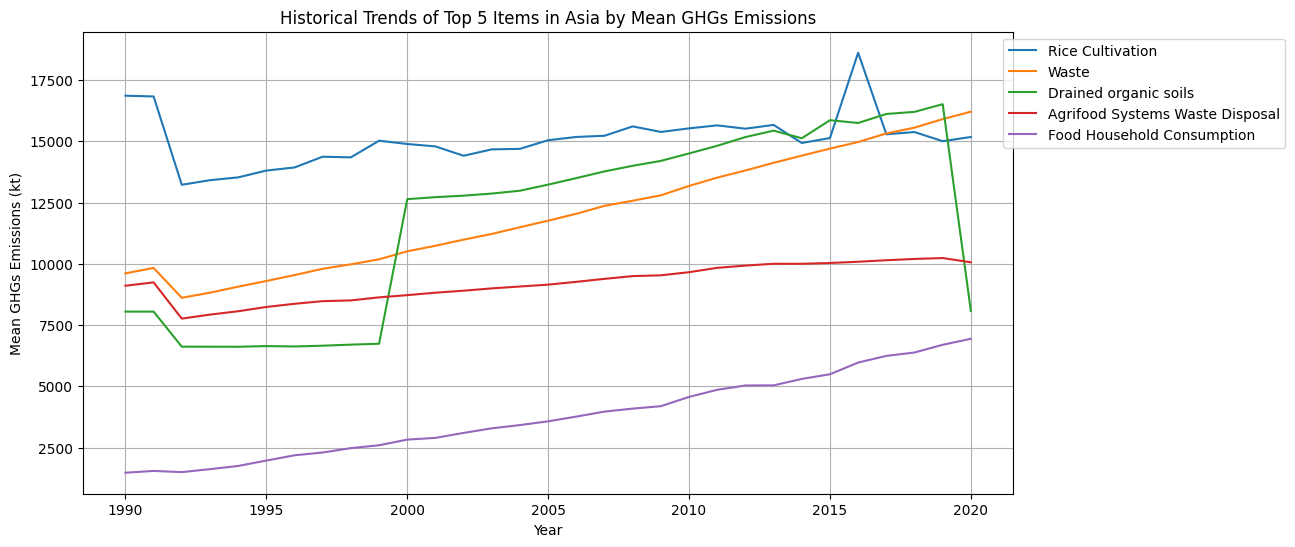

In [32]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item_asia = asia_df.groupby('Item')['Value'].mean().reset_index()

# Sort the items by mean CO2eq value in descending order
mean_co2eq_by_item_asia = mean_co2eq_by_item_asia.sort_values(by='Value', ascending=False)

# Select the top 5 items with the highest mean CO2eq values
top_5_items_asia = mean_co2eq_by_item_asia.head(5)

# Filter the original DataFrame to include only the top 5 items
top_5_history_asia = asia_df[asia_df['Item'].isin(top_5_items_asia['Item'])]

# Group by 'Item' and 'Year' on the filtered data and calculate the mean 'Value' for each combination
mean_co2eq_by_item_year_asia = top_5_history_asia.groupby(['Item', 'Year'])['Value'].mean().reset_index()

# Create a line plot for each of the top 5 items
plt.figure(figsize=(12, 6))

# Loop through the top 5 items and create a line plot for each item
for item in top_5_items_asia['Item']:
    item_asia = mean_co2eq_by_item_year_asia[mean_co2eq_by_item_year_asia['Item'] == item]
    plt.plot(item_asia['Year'], item_asia['Value'], label=item)

plt.title('Historical Trends of Top 5 Items in Asia by Mean GHGs Emissions')
plt.xlabel('Year')
plt.ylabel('Mean GHGs Emissions (kt)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

In [33]:
print(top_5_history)

              Area              Item                  Element  Year  \
31     Afghanistan  Rice Cultivation  Emissions (CO2eq) (AR5)  1990   
32     Afghanistan  Rice Cultivation  Emissions (CO2eq) (AR5)  1991   
33     Afghanistan  Rice Cultivation  Emissions (CO2eq) (AR5)  1992   
34     Afghanistan  Rice Cultivation  Emissions (CO2eq) (AR5)  1993   
35     Afghanistan  Rice Cultivation  Emissions (CO2eq) (AR5)  1994   
...            ...               ...                      ...   ...   
91462     Zimbabwe             Waste  Emissions (CO2eq) (AR5)  2016   
91463     Zimbabwe             Waste  Emissions (CO2eq) (AR5)  2017   
91464     Zimbabwe             Waste  Emissions (CO2eq) (AR5)  2018   
91465     Zimbabwe             Waste  Emissions (CO2eq) (AR5)  2019   
91466     Zimbabwe             Waste  Emissions (CO2eq) (AR5)  2020   

             Unit     Value  
31     kilotonnes   686.000  
32     kilotonnes   678.160  
33     kilotonnes   686.000  
34     kilotonnes   686.000

In [34]:
print(mean_co2eq_by_item_year)

                                Item  Year         Value
0    Agrifood Systems Waste Disposal  1990   5258.961404
1    Agrifood Systems Waste Disposal  1991   5284.810944
2    Agrifood Systems Waste Disposal  1992   4904.605520
3    Agrifood Systems Waste Disposal  1993   4939.279964
4    Agrifood Systems Waste Disposal  1994   5013.556420
..                               ...   ...           ...
522                            Waste  2016  11259.140877
523                            Waste  2017  11468.684042
524                            Waste  2018  11673.007076
525                            Waste  2019  11810.247487
526                            Waste  2020  11964.564728

[527 rows x 3 columns]


In [35]:
mean_co2eq_by_item_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Item    527 non-null    object 
 1   Year    527 non-null    int64  
 2   Value   527 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.5+ KB


In [36]:
mean_co2eq_by_item_year.to_csv('TotalEmission_CombinedCountry.csv', index=False)

##Prediction Model

####ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

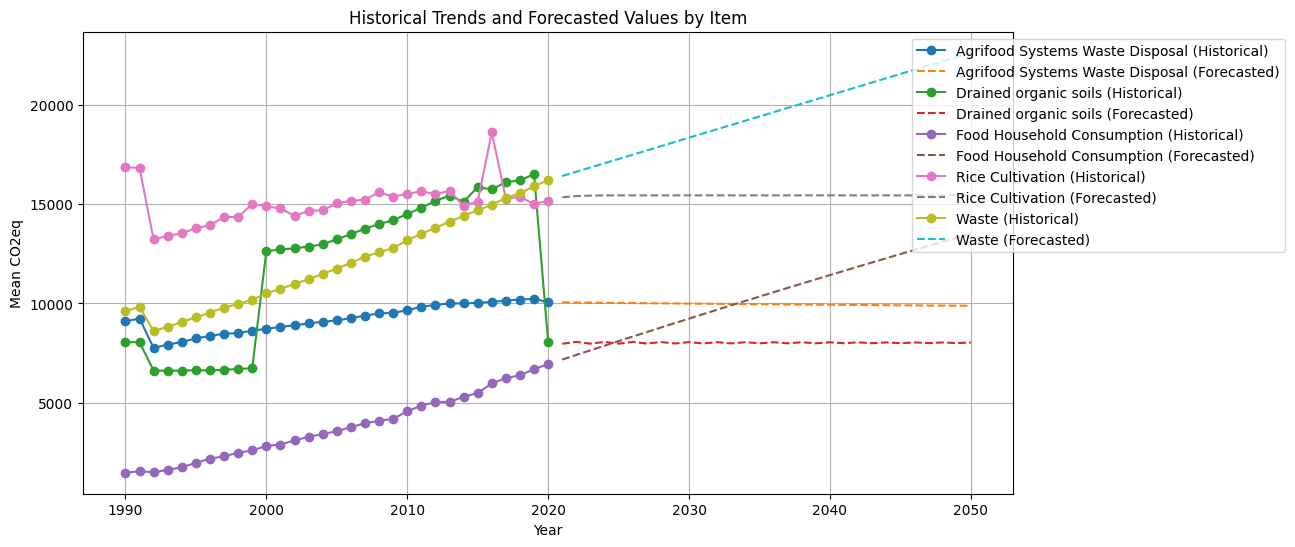

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Function to forecast future values using ARIMA
def forecast_arima(data, item):
    # Filter data for the specific item
    item_asia = data[data['Item'] == item]

    # Prepare the time series data (Year as the index and Value as the values)
    time_series = item_asia.set_index('Year')['Value']

    # Fit an ARIMA model
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future values (adjust the steps parameter as needed)
    steps = 30  # Number of future steps to predict
    forecast_values = model_fit.forecast(steps=steps)

    # Create a DataFrame for the forecasted values
    future_years = np.arange(time_series.index[-1] + 1, time_series.index[-1] + steps + 1)
    forecast_df = pd.DataFrame({'Year': future_years, 'Value': forecast_values})

    return forecast_df

# List of unique items
items = mean_co2eq_by_item_year_asia['Item'].unique()

# Perform forecasting for each item
forecasted_dfs = []
for item in items:
    forecasted_df = forecast_arima(mean_co2eq_by_item_year_asia, item)
    forecasted_dfs.append(forecasted_df)

# Plot the historical data and forecasted values for each item
plt.figure(figsize=(12, 6))
for item, forecasted_df in zip(items, forecasted_dfs):
    historical_data = mean_co2eq_by_item_year_asia[mean_co2eq_by_item_year_asia['Item'] == item]
    plt.plot(historical_data['Year'], historical_data['Value'], label=f'{item} (Historical)', marker='o')
    plt.plot(forecasted_df['Year'], forecasted_df['Value'], label=f'{item} (Forecasted)', linestyle='--')

plt.title('Historical Trends and Forecasted Values by Item')
plt.xlabel('Year')
plt.ylabel('Mean CO2eq')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

####ARIMA Accuracy

In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to forecast future values using ARIMA
def forecast_arima(data, item):
    # Filter data for the specific item
    item_asia = data[data['Item'] == item]

    # Prepare the time series data (Year as the index and Value as the values)
    time_series = item_asia.set_index('Year')['Value']

    # Fit an ARIMA model
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future values (adjust the steps parameter as needed)
    steps = 30  # Number of future steps to predict
    forecast_values = model_fit.forecast(steps=steps)

    # Create a DataFrame for the forecasted values
    future_years = np.arange(time_series.index[-1] + 1, time_series.index[-1] + steps + 1)
    forecast_df = pd.DataFrame({'Year': future_years, 'Value': forecast_values})

    return forecast_df

# Specify the item you want to forecast (e.g., 'waste')
item_to_forecast = 'waste'

# Perform forecasting for the specified item
forecasted_df = forecast_arima(mean_co2eq_by_item_year_asia, item_to_forecast)

# Plot the historical data and forecasted values for the specified item
plt.figure(figsize=(12, 6))
historical_data = mean_co2eq_by_item_year_asia[mean_co2eq_by_item_year_asia['Item'] == item_to_forecast]
plt.plot(historical_data['Year'], historical_data['Value'], label=f'{item_to_forecast} (Historical)', marker='o')
plt.plot(forecasted_df['Year'], forecasted_df['Value'], label=f'{item_to_forecast} (Forecasted)', linestyle='--')

plt.title(f'Historical Trends and Forecasted Values for {item_to_forecast}')
plt.xlabel('Year')
plt.ylabel('Mean CO2eq')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

# Calculate and print accuracy metrics (e.g., Mean Absolute Error)
actual_values = historical_data['Value']
forecasted_values = forecasted_df['Value']
mae = mean_absolute_error(actual_values, forecasted_values)
print(f'{item_to_forecast} MAE: {mae}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:534: RuntimeWarning: invalid value encountered in double_scalars
  return -self.loglike(params, *args) / nobs
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


IndexError: ignored

####Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sort the data by 'Year' for consistency
mean_co2eq_by_item_year_asia = mean_co2eq_by_item_year_asia.sort_values(by='Year')

# Split the data into training and testing sets
train_size = int(0.8 * len(mean_co2eq_by_item_year_asia))
train_data = mean_co2eq_by_item_year_asia[:train_size]
test_data = mean_co2eq_by_item_year_asia[train_size:]

# Create a linear regression model
model = LinearRegression()

# Initialize an empty DataFrame to store future predictions
future_predictions_df = pd.DataFrame(columns=['Year', 'Item', 'Value'])

# Predict future values for each item
future_years = np.arange(mean_co2eq_by_item_year_asia['Year'].max() + 1, 2051)  # Predict for years 2021 to 2030

# Loop through each unique item
for item in mean_co2eq_by_item_year_asia['Item'].unique():
    # Filter data for the current item
    item_train_data = train_data[train_data['Item'] == item]

    # Fit the model on the training data for the current item
    model.fit(item_train_data[['Year']], item_train_data['Value'])

    # Predict future values for the current item
    future_predictions = model.predict(future_years.reshape(-1, 1))

    # Create a DataFrame for future predictions for the current item
    future_df = pd.DataFrame({'Year': future_years, 'Item': item, 'Value': future_predictions})

    # Append the future predictions to the overall DataFrame
    future_predictions_df = pd.concat([future_predictions_df, future_df])

# Combine historical data and future predictions
combined_df = pd.concat([mean_co2eq_by_item_year_asia, future_predictions_df])

# Visualize the predictions for all items
plt.figure(figsize=(12, 6))

# Loop through each unique item and plot its historical and predicted data
for item in combined_df['Item'].unique():
    item_asia = combined_df[combined_df['Item'] == item]
    plt.plot(item_asia['Year'], item_asia['Value'], label=item)

plt.title('Historical Trends and Future Predictions for All Items')
plt.xlabel('Year')
plt.ylabel('Mean CO2eq')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

####Linear Regression Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict values using the trained model
predictions = model.predict(test_data[['Year']])

# Calculate evaluation metrics
mae = mean_absolute_error(test_data['Value'], predictions)
mse = mean_squared_error(test_data['Value'], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_data['Value'], predictions)

# Print evaluation results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")
